In [1]:
# %load science.py
%matplotlib notebook
from sympy import init_session, symbols
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import theano as T
#from sympy.geometry import *
init_session()
a,b,c = symbols('a b c')
r, theta, phi = symbols('r theta phi', positive=True)
print('Loaded a b c theta and phi')
print('Load Theano as T')

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/
Loaded a b c theta and phi
Load Theano as T


# Henon Map
This notebook explores, or is it plays, with the construction of the 2D Henon map. The equations are:
$$ x_{n + 1} = y_{n} + 1 - ax^2_n$$
$$ y_{n + 1} = b x_n$$

These are broken into three mapping steps. My first idea is to look at how each step transforms a line $-1 \leq x \leq 1$.The line is viewed as a 2d object with countable width and infinitely small thickness. 

The second idea is to plot successive iterations of that line in their final form on one plot to see how each iteration maps the original and subsequent objects. 

See also [Wen](http://chaosbook.org/projects/Wen14.pdf)

### Bayesian NUTS and Henon

It may be unrelated, but he Bayesian NUTS sampler appears to move around a similar shape, in a similar mapping process. 

In [2]:
#Step 1 of the iterate. Bend the line.
def Step1(xn, yn, a):
    return xn, yn + 1 -a*xn**2
#Step2: Squeeze up the x-axis
def Step2(xn, yn, b):
    return b*xn, yn
#Step3: Reverse the axes (90 degree rotation)
def Step3(xn,yn):
    return yn, xn
def Henon_map(xn,yn,a,b): #Made this explicit with unneeded intermediate variables.
    x = xn
    y = yn
    x1,y1 = Step1(x,y,a)
    x2,y2 = Step2(x1,y1,b)
    x3,y3 = Step3(x2,y2)
    return x3,y3

In [13]:
#Set some initial values; I use the one's from Henon. 
a = 1.4
b = 0.3
num_values = int(2e5)
x_min = -1
x_max = 1
#Create two arrays. It would be better code to create an array and manipulate it 
#but in this instance maybe clearer in the code using two arrays. 
xn = np.linspace(x_min,x_max, num_values)
yn = np.empty_like(xn)#Could declare zeroes but left obvious that one sets the value
yn.fill(0)#Filling with =1 blows up the model quickly
xn[:10],yn[:10]

(array([-1.     , -0.99999, -0.99998, -0.99997, -0.99996, -0.99995,
        -0.99994, -0.99993, -0.99992, -0.99991]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [14]:
xn2, yn2 = Henon_map(xn,yn,a,b)
xn3, yn3 = Henon_map(xn2,yn2,a,b)
xn4, yn4 = Henon_map(xn3,yn3,a,b)
xn5, yn5 = Henon_map(xn4,yn4,a,b)
xn6, yn6 = Henon_map(xn5,yn5,a,b)
xn7, yn7 = Henon_map(xn6,yn6,a,b)
xn8, yn8 = Henon_map(xn7,yn7,a,b)
xn9, yn9 = Henon_map(xn8,yn8,a,b)

In [15]:
fixed1 = (-(1-b)+np.sqrt((1-b)**2 +4*a))/(2*a)
fixed2 = (-(1-b)-np.sqrt((1-b)**2 +4*a))/(2*a)

<IPython.core.display.Javascript object>


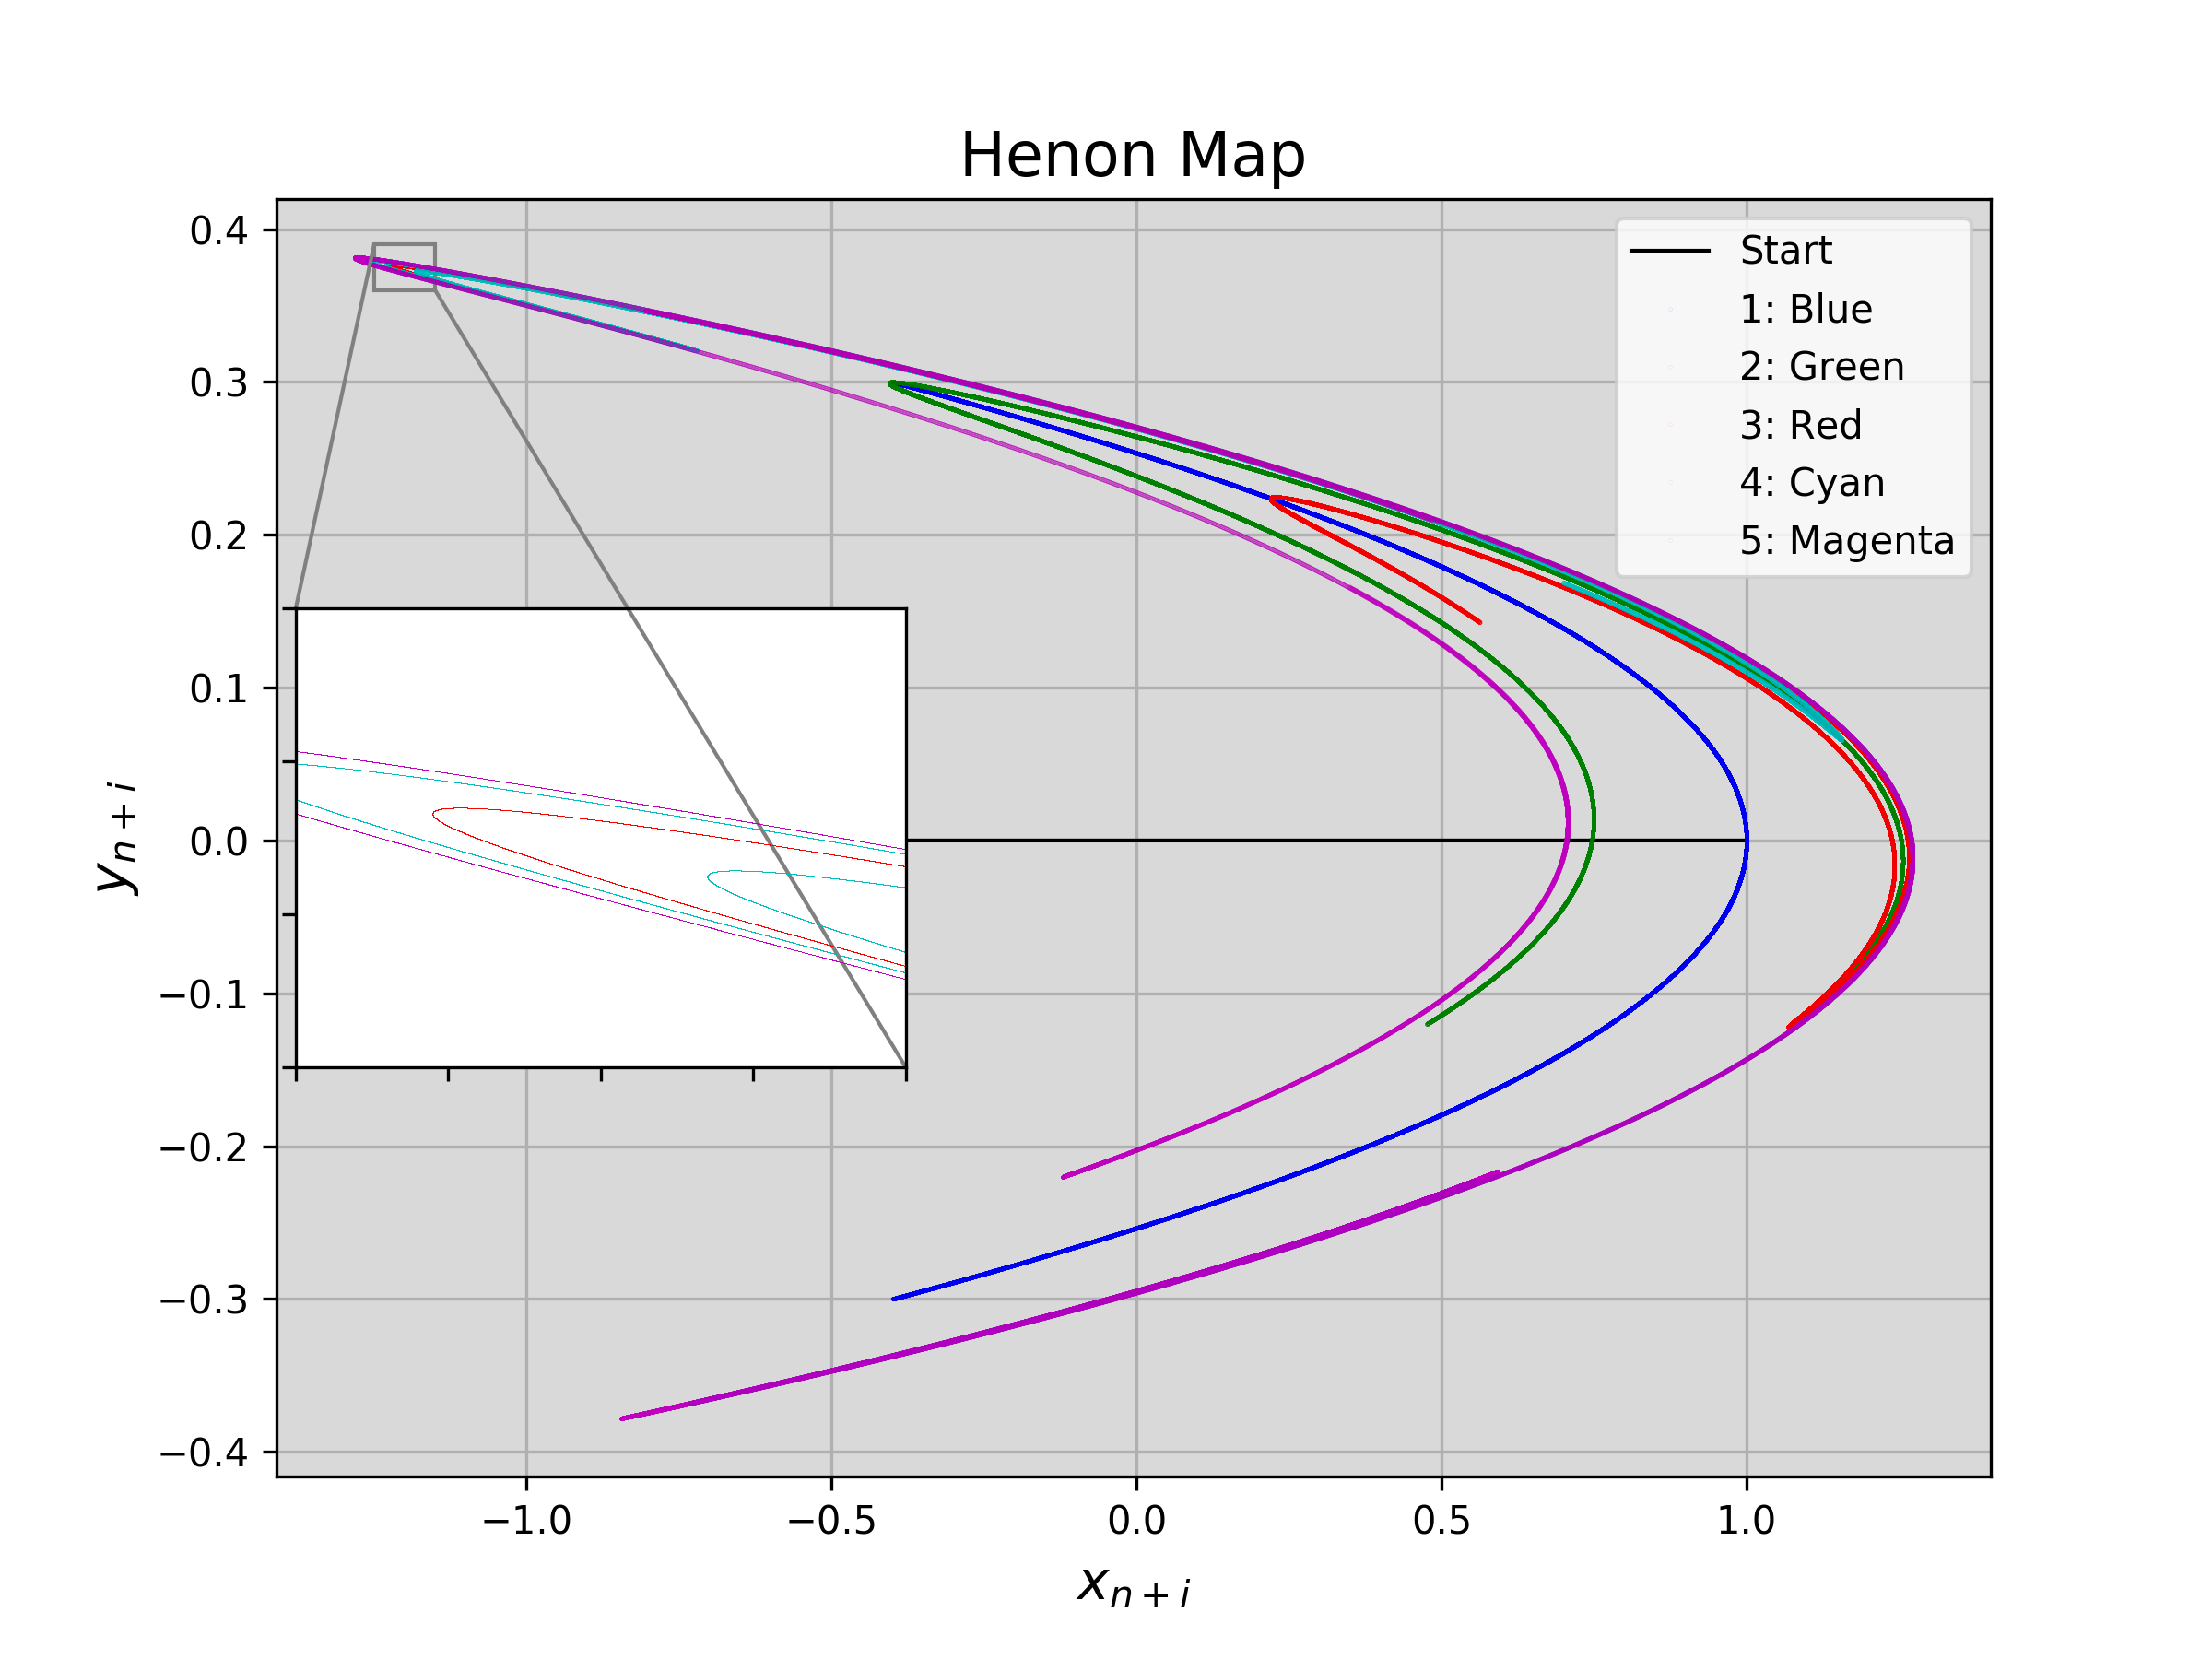

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1078527f0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1288286d8>)

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

#Plot the results of the iterations.
fig, ax0 = plt.subplots(1,1,figsize=(8,6))
ax0.set_facecolor(plt.cm.gray(.85))
ax0.set_title('Henon Map',size=16)
ax0.set_xlabel('$x_{n + i}$',size=14)
ax0.set_ylabel('$y_{n + i}$',size=14)
# ax0.plot(fixed1,fixed1,'ro')
# ax0.plot(fixed2,fixed2,'ro')
ax0.plot(xn,yn, 'k-',lw=1,label='Start')
ax0.plot(xn2,yn2, 'b.',markersize=.1,label='1: Blue',alpha=.3)
ax0.plot(xn3,yn3, 'g.',markersize=.1,label='2: Green',alpha=.3)
ax0.plot(xn4,yn4, 'r.',markersize=.1,label='3: Red',alpha=.3)
ax0.plot(xn5,yn5, 'c.',markersize=.1,label='4: Cyan',alpha=.3)
ax0.plot(xn6,yn6, 'm.',markersize=.1,label='5: Magenta',alpha=.3)
# ax0.plot(xn7,yn7, 'y.',markersize=.1,label='6: Yellow',alpha=.3)
# ax0.plot(xn8,yn8, 'k.',markersize=.1,label='7: Black',alpha=.3)
# ax0.plot(xn9,yn9, 'b.',markersize=.1,label='8: Blue',alpha=.3)
ax0.grid()
ax0.legend()

#Create an inset box.
axins = zoomed_inset_axes(ax0, 10, loc=6) # zoom-factor: 2.5, location: lower right
#axins.set_facecolor(plt.cm.gray(.9))
axins.plot(xn2, yn2,'b,')
axins.plot(xn3, yn3,'g,')
axins.plot(xn4, yn4,'r,')
axins.plot(xn5, yn5,'c,')
axins.plot(xn6, yn6,'m,')
# axins.plot(xn7, yn7,'y,')
# axins.plot(xn8, yn8,'k,')
# axins.plot(xn9, yn9,'b,')
x1, x2, y1, y2 = -1.25, -1.15, 0.36, 0.39 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)
mark_inset(ax0, axins, loc1=2, loc2=4, fc="none", ec="0.5")

If one sets the line to be between -1 and 1, the mapping rapidly becomes a long exponential type tail. You can zoom in on a thin x-slice of this to see the Henon 'tick'. 